# Unidade III - Aprendizagem Supervisionada - Classificação
# Aula 01: Algoritmo K-Nearest Neighbors (KNN)
# Roteiro
 * Entendendo o Algoritmo KNN
 * Analisando o Algoritmo KNN
 * Níveis de Complexidade do Algoritmo
 * Regressão com o Algoritmo KNN
 * Vantagens, desvantagesn e hiperparâmetros

## Entendendo o Algoritmo KNN

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Pacote auxiliar**
Instalação de pacote com funções auxiliares para Aprendizagem Supervisionada.

Mais informações em: https://pypi.org/project/mglearn/

In [1]:
!pip install mglearn

In [2]:
import mglearn

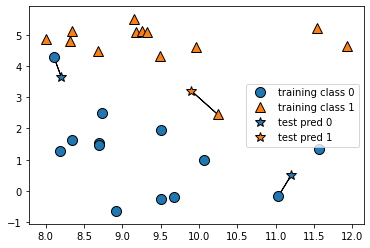

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

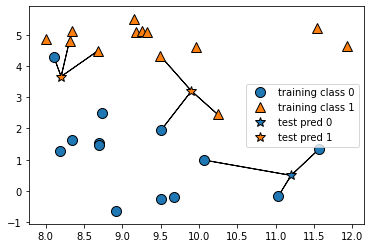

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

**Conjunto de dados genérico**

**Forge** é um conjunto de dados genérico, que possui dois atributos. A seguir é mostrado um gráfico de dispersão com todos os pontos de dados. A cor do ponto indica sua classe, sendo que vermelho significa a classe 0 e azul a classe 1.

X.shape: (26, 2)


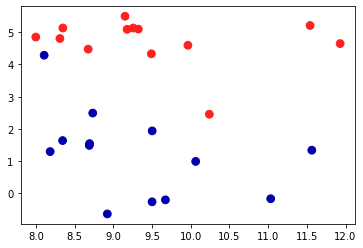

In [5]:
X, y = mglearn.datasets.make_forge()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
print("X.shape: %s" % (X.shape,))

In [6]:
from sklearn.model_selection import train_test_split
#X, y = mglearn.datasets.make_forge()

#Dividir em conjunto de teste treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
print("Previsões para o conjunto de teste:", clf.predict(X_test))

Previsões para o conjunto de teste: [1 0 1 0 1 0 0]


In [10]:
print("Acurácia do conjunto de teste: {:.2f}".format(clf.score(X_test, y_test)))

Acurácia do conjunto de teste: 0.86


## Analisando o Algoritmo KNN

Podemos ilustrar a previsão para todos os pontos de teste possíveis para o conjunto de dados genérico Forge. Na figura a seguir, colorimos o plano de vermelho nas regiões onde os pontos seriam atribuídos à classe vermelha e, caso contrário, de azul. Isso nos permite visualizar o limite de decisão, que é a divisão entre onde o algoritmo atribui a classe vermelha e onde ele atribui a classe azul.

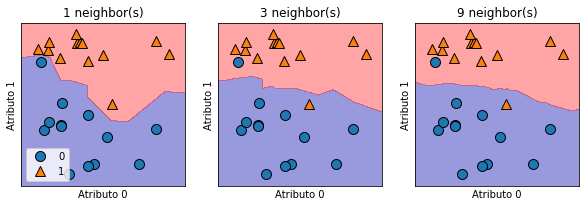

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Atributo 0")
    ax.set_ylabel("Atributo 1")
axes[0].legend(loc=3)

## Níveis de Complexidade do Algoritmo

Vamos investigar se podemos confirmar a conexão entre a complexidade do modelo e seu poder de generalização. Faremos isso no conjunto de dados de câncer de mama do mundo real. Avaliaremos o desempenho do treinamento e do conjunto de testes com diferentes números de vizinhos.

**Exemplo Base de Dados**
Conjunto de dados do estado americano de Wisconsin sobre câncer de mama.

Mais informações em: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [12]:
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [13]:
print("Formato dos dados: ", cancer.data.shape)

Formato dos dados:  (569, 30)


In [14]:
print("Quantidade de exemplos de cada classe:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Quantidade de exemplos de cada classe:
 {'malignant': 212, 'benign': 357}


In [15]:
print("Nome dos atributos (Features):\n", cancer.feature_names)

Nome dos atributos (Features):
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


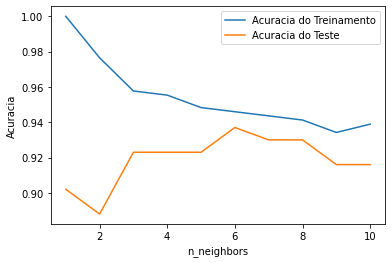

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# iterar n_neighbors de 1 a 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # instanciar o classificador
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # armazenar a acurácia do treinamento
    training_accuracy.append(clf.score(X_train, y_train))
    # armazenar a acurácia do erro de generalização
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Acuracia do Treinamento")
plt.plot(neighbors_settings, test_accuracy, label="Acuracia do Teste")
plt.ylabel("Acuracia")
plt.xlabel("n_neighbors")
plt.legend()

O gráfico acima mostra a acurácia do conjunto de treinamento e teste no eixo y em comparação com a configuração de N vizinhos no eixo x. Podemos reconhecer algumas das características de **overfitting**. Considerando um único vizinho mais próximo, a previsão do conjunto de treinamento é perfeita. Considerando mais vizinhos, a acurácia do treinamento diminui. A precisão do conjunto de teste para usar um único vizinho é menor do que ao usar mais vizinhos, indicando que usar um único vizinho mais próximo leva a um modelo que é pouco complexo. Por outro lado, ao considerar 10 vizinhos o desempenho não é o melhor possível. O melhor desempenho está em algum lugar no meio, usando seis vizinhos. Deve-se ter em mente que o pior desempenho é de cerca de 88% de acurácia, o que ainda pode ser aceitável.

## Regressão com o Algoritmo KNN

Também existe uma variante de regressão do algoritmo de KNN. Mais uma vez, vamos começar usando um único vizinho mais próximo, utilizando outro conjunto de dados genérico. Observe a figura a seguir: adicionamos três itens de dados de teste como estrelas verdes no eixo x. A previsão usando um único vizinho é apenas o valor do vizinho mais próximo, mostrado como a estrela azul.

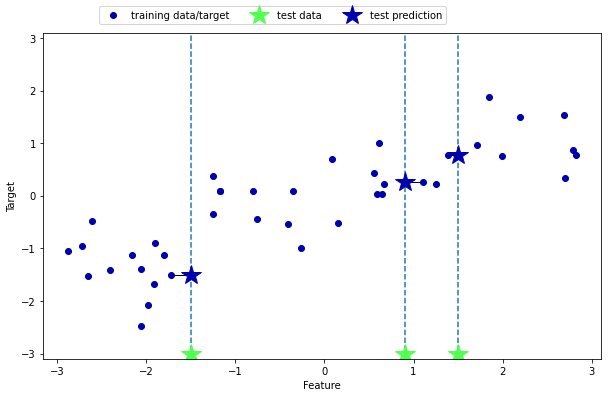

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Também podemos usar mais de um vizinho mais próximo para a regressão. Ao usar vários vizinhos mais próximos, a previsão é a média dos vizinhos mais relevantes.

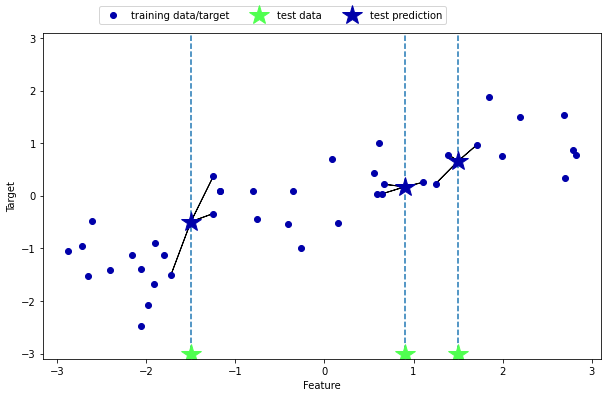

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Dividir em conjuntos de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instanciar o classificador e alterar o número de vizinhos para 3
reg = KNeighborsRegressor(n_neighbors=3)

# Treinar o classificador
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [20]:
print("Previsões do conjunto de teste:\n", reg.predict(X_test))

Previsões do conjunto de teste:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
print("R^2 do Conjunto de Teste: {:.2f}".format(reg.score(X_test, y_test)))

R^2 do Conjunto de Teste: 0.83


**Analisando o Regressor KNN**

Para conjuntos de dados unidimensionais, podemos facilmente ver as previsões para todos os valores possíveis dos atributos. Na figura a seguir, os pontos vermelhos são as respostas para os dados de treinamento, enquanto a linha vermelha é a previsão feita pelo classificador para todos os itens de dados. Usando apenas um único vizinho, cada ponto no conjunto de treinamento tem uma influência óbvia nas previsões, e os valores previstos passam por todos os pontos de dados. Isso leva a uma previsão muito instável. Considerar mais vizinhos leva a previsões mais suaves, mas elas também não se ajustam bem aos dados de treinamento.

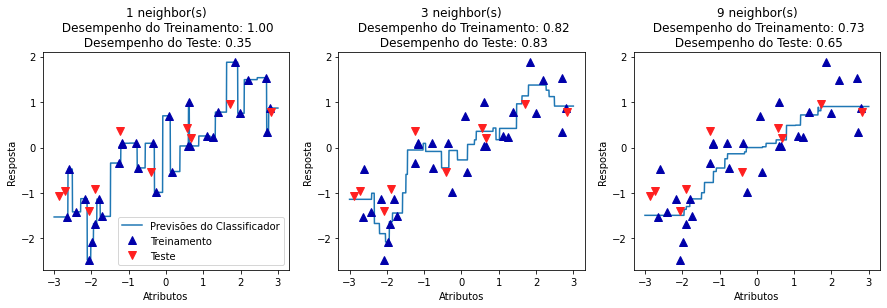

In [22]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Criar 1000 exemplos, no intervalo -3 e 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    
    # Fazer as previsões com 1, 3, ou 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n Desempenho do Treinamento: {:.2f}\n Desempenho do Teste: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Atributos")
    ax.set_ylabel("Resposta")
axes[0].legend(["Previsões do Classificador", "Treinamento",
                "Teste"], loc="best")

## Vantagens, desvantagens e hiperparâmetros

A princípio, existem dois hiperparâmetros importantes para o classificador KNN: o número de vizinhos e como você mede a distância entre os itens de dados. Na prática, usar um pequeno número de vizinhos como 3 ou 5 geralmente funciona bem, mas você certamente deve ajustar esse hiperparâmetro. A escolha da medida de distância certa está um pouco além do escopo deste capítulo. Por padrão, a distância euclidiana é usada, o que funciona bem em muitos conjuntos de dados.

Um dos pontos fortes do KNN é que a estratégia do classificador é muito fácil de entender e geralmente oferece um desempenho razoável sem muitos ajustes. Este algoritmo é um bom método base antes de considerar técnicas mais avançadas. Ao usá-lo, é importante pré-processar seus dados pois muitas vezes o algoritmo não funcionam bem em conjuntos de dados com muitos atributos ou em dados esparsos. Embora KNN seja fácil de entender, o algoritmo pode apresentar lentidão da previsão devido à sua incapacidade de lidar com muitos atributos.